In [1]:
import sys
  
# append the path of the
# parent directory
sys.path.append("..")

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import json, csv
import mne
import scipy
import pandas
import mbt_pyspt as mbt
from mbt_pyspt.models.eegdata import EEGData
from mbt_pyspt.modules.preprocessingflow import PreprocessingFlow
from utils.em_data_loader import generate_participants_events
from utils.em_data_loader import generate_participants_datasets
from utils.em_data_loader import load_dataset
from scipy.fft import fft, fftfreq
from pprint import pprint

print("All libraries successfully loaded!")

All libraries successfully loaded!


In [ ]:
# Prepare all the datasets
path_eo_ec = '../data/em_ca_experiment_slim/1EOEC'
path_ec_eo = '../data/em_ca_experiment_slim/2ECEO'
excluded = ['s050702', 's020702', 's060702', 's250603', 's220603', 's220604' 's170603', 's050703', 's050705']
eo_ec_folders = []
ec_eo_folders = []
eeg_folder = 'eeg_raw'
metadata_folder = 'metadata'
physio_folder = 'physio_raw'

for directory in os.listdir(path_eo_ec):
    if directory != 'excluded':
        eo_ec_folders.append(directory)
for directory in os.listdir(path_ec_eo):
    if directory != 'excluded':
        ec_eo_folders.append(directory)


generate_participants_datasets(path_eo_ec, eo_ec_folders, '1EOEC')
generate_participants_datasets(path_ec_eo, ec_eo_folders, '2ECEO')

print("All datasets prepared")
        
    


In [2]:
dataset = load_dataset()
print(dataset.keys())

dict_keys(['s010701', 's010702', 's010703', 's010704', 's020701', 's020702', 's020703', 's020704', 's050701', 's050702', 's050704', 's060703', 's070701', 's070702', 's170601', 's210602', 's220602', 's230602', 's230603', 's230604', 's240601', 's240602', 's240604', 's250601', 's250602', 's250604', 's260601', 's260602', 's280601', 's280603', 's280604', 's290601', 's290602', 's290603', 's290604', 's290605', 's300602', 's300604'])


Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 20.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 39 - 41 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design 

<ipython-input-25-10f8854e8395>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)


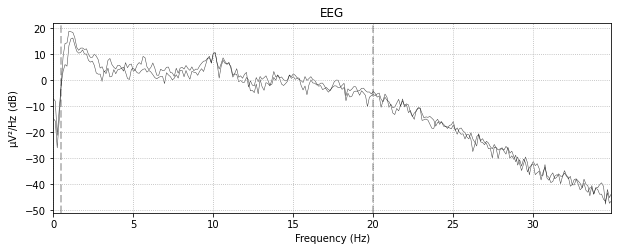

Effective window size : 8.192 (s)


<ipython-input-25-10f8854e8395>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)


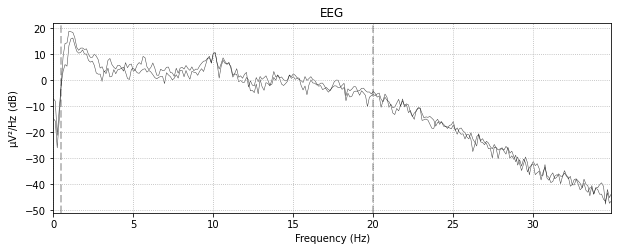

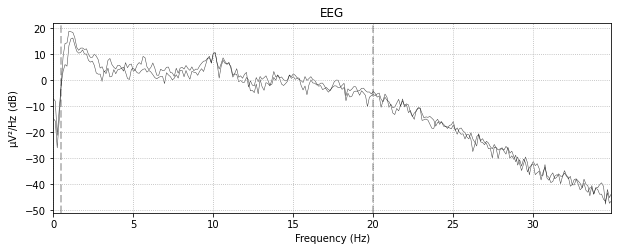

In [25]:
dataset = open("../data/prepared/s010701_prepared.json")
data = json.load(dataset)

channel_data = data['trials']['EO/class_4_B']['eeg']
sampling_rate = data['sampRate']
channel_locations = data['acquisitionLocation']
raw = EEGData(channel_data, sampling_rate, channel_locations)
raw_notch = raw.mne_data.notch_filter([50, 100])
raw_filter = raw_notch.filter(0.5, 20, method='iir').notch_filter(40)
raw.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)
raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)

In [ ]:
# Experimenting with MNE epoching
full_dataset = open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p1/2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json")
full_data = json.load(full_dataset)

dataset = open("../data/prepared/s010701_prepared.json")
data = json.load(dataset)

channel_data = full_data['recording']['channelData']
sampling_rate = full_data['header']['sampRate']
channel_locations = full_data['header']['acquisitionLocation']

 # READ RAW JSON AND MAKE MNE-STRUCTURES
raw = EEGData(channel_data, sampling_rate, channel_locations)
    # CREATE EVENTS
events = full_data['events']

# FILTER THE DATA
raw_notch = raw.mne_data.notch_filter([50, 100])
raw_filter = raw_notch.filter(0.5, 20, method='iir').notch_filter(40)

print(events[:5])  # show the first 5

In [ ]:
raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)

In [ ]:
tmax = 60
tmin = -.5
bline = (None, -0.056)
epochs_20 = mne.Epochs(raw_filter, events, event_id=3, tmin = tmin, tmax = tmax, proj=True, baseline=bline, preload = True)
print(epochs_20)
epochs_20.plot_psd(fmax=35, picks=channel_locations, average=False)

In [ ]:
# Repair broken dataset S220603

file_part_one = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p1/2021-06-22_14-26-52.267-Acquisier-melo_1010300034.json")
file_part_two = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034.json")
file_part_three = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-48-08.229-Acquisier-melo_1010300034.json")


data_p1 = json.load(file_part_one)
data_p2 = json.load(file_part_two)
data_p3 = json.load(file_part_three)

eeg_p1 = data_p1['recording']['channelData']
status_p1 = data_p1['recording']['statusData']
q_p1 = data_p1['recording']['qualities']

eeg_p2 = data_p2['recording']['channelData']
status_p2 = data_p2['recording']['statusData']
q_p2 = data_p2['recording']['qualities']
n_p2 = data_p2['recording']['nbPackets']

eeg_p3 = data_p3['recording']['channelData']
status_p3 = data_p3['recording']['statusData']
q_p3 = data_p3['recording']['qualities']
n_p3 = data_p3['recording']['nbPackets']

print(len(eeg_p1[0]), len(data_p2['recording']['channelData'][0]))
print(len(status_p1), len(data_p2['recording']['statusData']))
print(len(q_p1[0]), len(data_p2['recording']['qualities'][0]))
print()
data_p2['recording']['channelData'] = [eeg_p2[0] + eeg_p3[0], eeg_p2[1] + eeg_p3[1]]
data_p2['recording']['statusData'] = status_p2 + status_p3
data_p2['recording']['qualities'] = [q_p2[0] + q_p3[0], q_p2[1] + q_p3[1]]
data_p2['recording']['nbPackets'] = n_p2 + n_p3
data_p2['recording']['recordingTime'] = data_p3['recording']['recordingTime']

print(len(eeg_p1[0]), len(data_p2['recording']['channelData'][0]))
print(len(status_p1), len(data_p2['recording']['statusData']))
print(len(q_p1[0]), len(data_p2['recording']['qualities'][0]))
out_file = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034_merged.json", "w")
  
json.dump(data_p2, out_file)
  
out_file.close()  
file_part_one.close()
file_part_two.close()
file_part_three.close()

In [ ]:
out_file = open("../data/em_ca_experiment_slim/2ECEO/excluded/malformed_data/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034_merged.json", "r")
data = json.load(out_file)
statusData = data['recording']['statusData']
i = 0
t_idx = []
while i < len(statusData):
    if statusData[i] == 1.0:
        print("Second: " + str(i/250) + " - Index: " + str(i))
        t_idx.append(i)
        i += 250
    else:
        i += 1
        
#print(t_idx)
